In [19]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

**In general, applying PCA before building a model will NOT help to make the model perform better (in terms of accuracy)!**

This is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature has large variance as important features, but the feature has large variance can have noting to do with the prediction target.

This means, you can produce a lot of useless features and eliminate useful features after PCA.

In [1]:
import csv

url = 'https://drive.google.com/file/d/1FMiCB5X2sSHtuNtY936mXEvg4i1AMO-W/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df




NameError: ignored

In [10]:
df
data=df

In [11]:
df_train = df.sample(frac = 0.8)
df_test = df.drop(df_train.index, axis = 0)

x_train = df_train.drop(columns = ['RainTomorrow'])
y_train = pd.DataFrame(df_train['RainTomorrow'])

x_test = df_test.drop(columns = ['RainTomorrow'])
print(len(x_test.columns))
y_test = pd.DataFrame(df_test['RainTomorrow'])

x_train = df_train.drop(columns = ['RainTomorrow'])
y_train = pd.DataFrame(df_train['RainTomorrow'])

x_test = df_test.drop(columns = ['RainTomorrow'])

10


In [12]:
from sklearn.preprocessing  import StandardScaler

standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(x_train)

x_train = pd.DataFrame(standard_scaler.transform(x_train))

means = standard_scaler.mean_
vars = standard_scaler.var_
print(len(x_test.columns))
i = 0
for col in x_test.columns:
  x_test[col] = (x_test[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(x_test.describe())


10
                PC1           PC2           PC3           PC4           PC5  \
count  28428.000000  28428.000000  28428.000000  28428.000000  28428.000000   
mean      -0.006588      0.009517     -0.010280     -0.004827     -0.008662   
std        0.999553      0.998076      0.999343      1.003362      0.988412   
min       -3.320960     -3.000094     -3.804440     -3.737962     -3.430067   
25%       -0.704607     -0.695625     -0.696038     -0.678521     -0.619070   
50%        0.055038     -0.089883     -0.100478     -0.000268     -0.038018   
75%        0.742425      0.613343      0.584732      0.631695      0.543632   
max        3.713662      4.646641      8.119524      8.212182     21.055504   

                PC6           PC7           PC8           PC9          PC10  
count  28428.000000  28428.000000  28428.000000  28428.000000  28428.000000  
mean      -0.003180      0.011088      0.007573     -0.004340     -0.006199  
std        1.001444      0.997822      0.974382    

 **1. Gaussian Naive Bayes**


In [27]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_pred=gnb.predict(x_test)
print(y_pred)

[0 1 1 ... 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [28]:
#Check the accuracy
from sklearn import metrics
pp=precision_score(y_test, y_pred, average = 'weighted')
rr=recall_score(y_test, y_pred, average = 'weighted')
ff=f1_score(y_test, y_pred, average = 'weighted')
temp=[pp,rr,ff]
print(temp)

[0.7916873616016972, 0.806845363725904, 0.7959831954966762]


In [16]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm= np.array(confusion_matrix(y_test, y_pred))

print(cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

[[20223  1940]
 [ 3551  2714]]

True Positives(TP) =  20223

True Negatives(TN) =  2714

False Positives(FP) =  1940

False Negatives(FN) =  3551


Confusion matrix gives a summary of correct and incorrect predictions broken down by each category.
The summary is represented in a tabular form.

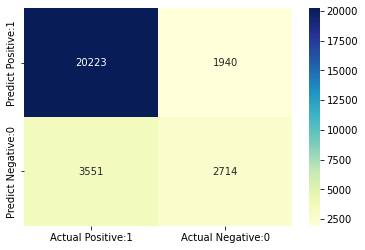

In [17]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**2. Logistic Regression**


In [29]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression(max_iter=100,penalty='l2')
model.fit(x_train, y_train) 
predictions = model.predict(x_test)
pp=precision_score(y_test, predictions, average = 'weighted')
rr=recall_score(y_test, predictions, average = 'weighted')
ff=f1_score(y_test, predictions, average = 'weighted')
temp=[pp,rr,ff]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [30]:
print(temp)

[0.8206572664109599, 0.8337554523709019, 0.8195615120076329]


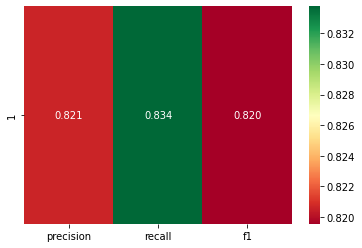

In [32]:
prf=[]
prf=prf+[temp]
prf=pd.DataFrame(prf)
prf.set_axis(['precision', 'recall','f1'], axis='columns', inplace=True)
prf.set_axis([1], axis='rows', inplace=True)
sns.heatmap(prf,annot=True,fmt='.3f',cmap='RdYlGn')

[0.8267965195284297, 0.8383753107265137, 0.8247564061954583] without pca for Log Reg


**3. Random Forest**

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


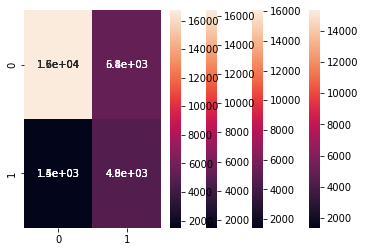

In [33]:
precs = []
accs = []
depths = []

from sklearn.ensemble import RandomForestClassifier
for depth in range(3,7):
  depths.append(depth)
  rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = depth,random_state=950)
  y_pred = rfc.fit(x_train, np.ravel(y_train)).predict(x_test)
  precs.append(precision_score(y_test, y_pred))
  accs.append(accuracy_score(y_test, y_pred))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

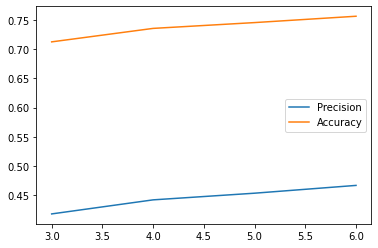

In [34]:
sns.lineplot(x=depths, y=precs, label = "Precision")
sns.lineplot(x=depths, y=accs, label = "Accuracy")

**4. ADAboost**

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8,criterion='gini',random_state=0)
lst=[]
mdepth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in range(20):
  ada = AdaBoostClassifier(base_estimator=dt,n_estimators=mdepth[i])
  ada.fit(x_train,y_train)
  y_vp = ada.predict(x_test)
  vsc = precision_score(y_test, y_vp, average = 'weighted') 
  rcl = recall_score(y_test, y_vp, average = 'weighted')
  f1 = f1_score(y_test, y_vp, average = 'weighted')
  lst=lst+[[vsc,rcl,f1]]
lst=pd.DataFrame(lst)
lst.set_axis([ 'precision','recall','f1'], axis='columns', inplace=True)
lst.set_axis([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], axis='rows', inplace=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was 

<Figure size 1152x432 with 0 Axes>

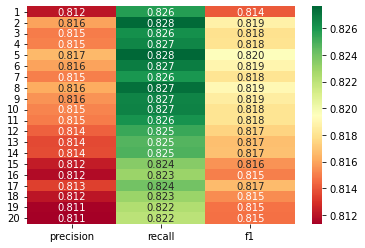

<Figure size 1152x432 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
sns.heatmap(lst,annot=True,fmt='.3f',cmap='RdYlGn')

plt.figure(figsize=(16,6)) 